## Random Forest Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error


#### Declare some visual functions

In [2]:
def plot_actual_vs_predicted(X_validation, y_actual, y_pred, feature, xlabel, ylabel):
    """
    Draw a scatter plot comparing actual and predicted values for a specific feature.

    Parameters:
    X_validation (pd.DataFrame): Input data containing the feature to be plotted.
    y_actual (array-like): Actual value.
    y_pred (array-like): Predicted value.
    feature (str): Column name in X_validation to compare.
    xlabel (str): Label for the X-axis (name of the feature displayed on the chart).
    ylabel (str): Label for the Y-axis (e.g. Price, Area, ...).
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(X_validation[feature], y_actual, c='r', marker='o', label="Actual values", alpha=0.5) 
    plt.scatter(X_validation[feature], y_pred, c='b', marker='s', label="Predicted values", alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(f"Scatter Plot of Actual vs Predicted {ylabel} per {xlabel}")
    plt.show()

#### Select feature

##### Read data

- Training set

In [3]:
df = pd.read_csv("TransformedData.csv")
df.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Legal Status,House Direction,Floors,Rooms,Toilets,Furnishing Sell,Price
0,10.401867,4.001773,8.062258,2.236068,-0.647076,1,2.0,1.414214,1.818446,1.414214,4.0,-1.467406
1,10.401884,4.001535,8.062258,2.236068,-0.815934,1,6.0,1.414214,1.818446,1.732051,3.0,-1.467329
2,10.404109,4.005330,9.486833,2.236068,0.703785,1,1.0,2.236068,2.893444,2.645751,4.0,-1.449948
3,10.399711,4.005830,8.660254,2.236068,-0.309361,4,7.0,1.000000,1.443635,1.000000,1.0,-1.354036
4,10.400744,4.006028,8.944272,2.236068,0.534928,5,6.0,1.000000,0.881374,1.000000,4.0,-1.351444


##### Input variables

- Training set

In [4]:
x = df.drop(columns=["Price", "Width (m)", "Legal Status"])
x.head()

,Longitude,Latitude,Area (m²),Length (m),House Direction,Floors,Rooms,Toilets,Furnishing Sell
0,10.401867,4.001773,8.062258,-0.647076,2.0,1.414214,1.818446,1.414214,4.0
1,10.401884,4.001535,8.062258,-0.815934,6.0,1.414214,1.818446,1.732051,3.0
2,10.404109,4.005330,9.486833,0.703785,1.0,2.236068,2.893444,2.645751,4.0
3,10.399711,4.005830,8.660254,-0.309361,7.0,1.000000,1.443635,1.000000,1.0
4,10.400744,4.006028,8.944272,0.534928,6.0,1.000000,0.881374,1.000000,4.0


##### Target variables

- Training set

In [5]:
y = df[['Price']]
y.head()

,Price
0,-1.467406
1,-1.467329
2,-1.449948
3,-1.354036
4,-1.351444


##### Divide into 2 training sets and validation sets

 - Split data

In [6]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.3, random_state=43)
y_train = np.ravel(y_train)
y_validation = np.ravel(y_validation)
print(X_train.shape, X_validation.shape)
print(y_train.shape, y_validation.shape)

(2885, 9) (1237, 9)
(2885,) (1237,)


#### Model training

##### Create a RandomForestRegressor model object from the ensemble library and train it with input and target variables

In [7]:
randomForest_regressor = RandomForestRegressor(
    n_estimators=100,
    criterion='squared_error', 
    max_depth=10,           
    min_samples_split=2,    
    min_samples_leaf=1,     
    max_features=None,   
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    oob_score=False, 
    n_jobs=None,
    random_state=False, 
    verbose=0,
    warm_start=False
)

randomForest_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=None, random_state=False)

##### Real estate price prediction

- On the train set

In [8]:
y_pred_train = randomForest_regressor.predict(X_train)
y_pred_train

array([-0.3878728 ,  0.2339787 , -0.77285111, ..., -0.38427941,
       -0.59489357,  0.16098636])

- Prediction on validation set

In [9]:
y_pred_validation = randomForest_regressor.predict(X_validation)
y_pred_validation

array([ 0.26144258, -0.57762519,  0.69453604, ...,  0.10126968,
        0.6644584 , -0.54158701])

#### Model Evaluation

##### Calculation of mean square error MSE

- Train

In [10]:
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.09689015188630157


- Validation set

In [11]:
mse = mean_squared_error(y_validation, y_pred_validation)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.3002973731460631


##### R-squared tells us how much of the target variable the input variables can explain. The larger the R-squared, the better the model. When R-squared is 95%, it means that the input variables have explained 95% of the variation in the target variable.

- Train set

In [12]:
R_squared = r2_score(y_train, y_pred_train)
print("R² Score:", R_squared)

R² Score: 0.9046395069065767


- Validation set

In [13]:
R_squared = r2_score(y_validation, y_pred_validation)
print("R² Score:", R_squared)

R² Score: 0.6880307195830422


##### MAPE is an index that measures the percentage error between the forecast value and the actual value (mean absolute percentage error) <br> When a model has MAPE = 5%, we say that the model has an average error of 5% compared to the average value

- Train set

In [14]:
mape = mean_absolute_percentage_error(y_train, y_pred_train)
print("MAPE:", mape)

MAPE: 1.3465663277607978


- Validation set

In [15]:
mape = mean_absolute_percentage_error(y_validation, y_pred_validation)
print("MAPE:", mape)

MAPE: 1.4512923281395285


##### Visualization of the *Price* characteristic difference between the initial value and the predicted value

- Training set

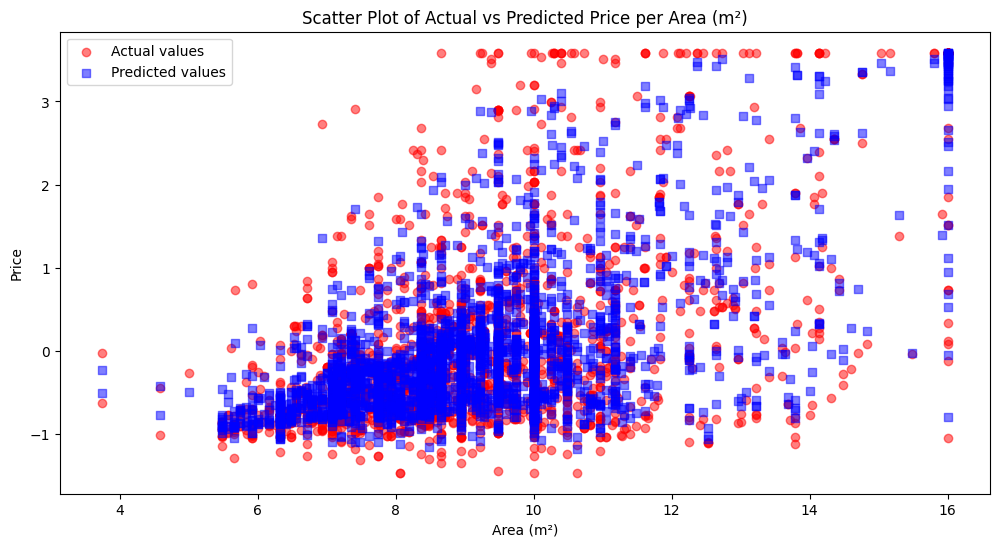

In [16]:
plot_actual_vs_predicted(X_train, y_train, y_pred_train, "Area (m²)", "Area (m²)", "Price")

- Validation set 

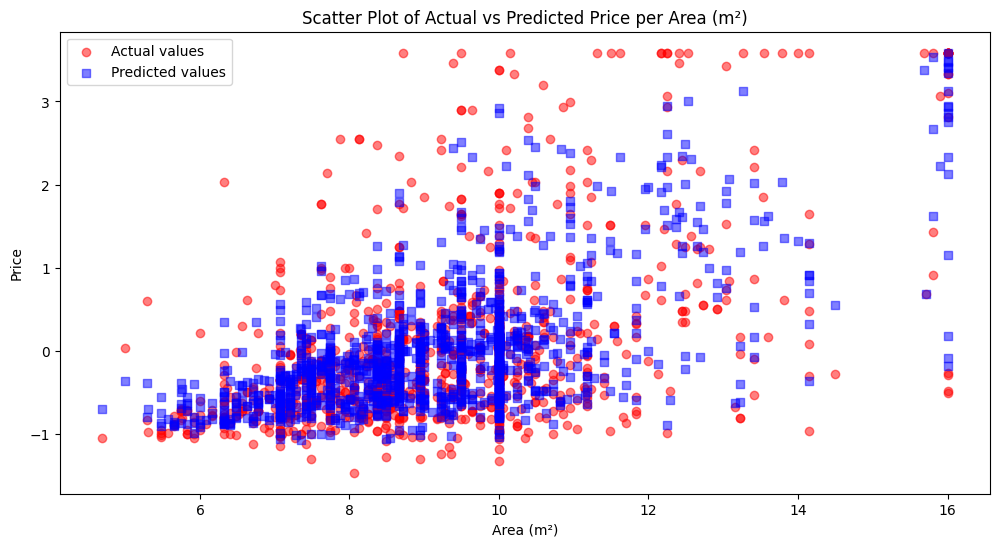

In [17]:
plot_actual_vs_predicted(X_validation, y_validation, y_pred_validation, "Area (m²)", "Area (m²)", "Price")

#### Conclusion

- RandomForestRegressor is a powerful algorithm for regression, which often gives good results for non-linear or high-dimensional data.
- By combining multiple Decision Trees and averaging their predictions, it helps reduce overfitting compared to using a single decision tree.
- The algorithm can handle data with many features well and provides the importance index of each feature, which is helpful for variable selection. However, the model is not good at predicting values ​​outside the training data range.